<a href="https://colab.research.google.com/github/Dipesh-empire/Face-mask-detection-/blob/main/Backend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing all the essential libraries

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt
import zipfile, os


## Upload the zip file and extract the data

In [5]:
from google.colab import files

# Step 1: Upload ZIP file
uploaded = files.upload()  # 🔼 Upload a zip file containing `train/` and `test/` folders

# Step 2: Unzip it
zip_filename = list(uploaded.keys())[0]

with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall('data')  # ✅ Extract to 'data/' folder

# Show extracted structure
print("Extracted folders:", os.listdir("data"))

Saving data.zip to data.zip
Extracted folders: ['data']


## SET parameters


In [8]:
# 🔧 Step 2: Set constants
IMG_SIZE = 150
BATCH_SIZE = 32
EPOCHS = 20

# 🧪 Step 3: Data Augmentation and Loading
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    'data/data/train',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

test_gen = test_datagen.flow_from_directory(
    'data/data/test',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 6042 images belonging to 2 classes.
Found 1511 images belonging to 2 classes.


## Build  the CNN model


In [10]:
# 🧠 Step 4: Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # 2 classes: mask, no_mask
])


## Define Call backs

In [14]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2),
    ModelCheckpoint('face_mask_detector.h5', save_best_only=True)
]
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



## Train the model

In [16]:
history = model.fit(
    train_gen,
    validation_data=test_gen,
    epochs=15,
    callbacks=callbacks
)

Epoch 1/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9519 - loss: 0.1309

189/189 ━━━━━━━━━━━━━━━━━━━━ 308s 2s/step - accuracy: 0.9519 - loss: 0.1310 - val_accuracy: 0.8987 - val_loss: 0.2297 - learning_rate: 2.5000e-04
Epoch 2/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 291s 2s/step - accuracy: 0.9423 - loss: 0.1484 - val_accuracy: 0.8987 - val_loss: 0.2432 - learning_rate: 2.5000e-04
Epoch 3/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9437 - loss: 0.1418

189/189 ━━━━━━━━━━━━━━━━━━━━ 294s 2s/step - accuracy: 0.9438 - loss: 0.1418 - val_accuracy: 0.9100 - val_loss: 0.2265 - learning_rate: 2.5000e-04
Epoch 4/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 319s 2s/step - accuracy: 0.9502 - loss: 0.1284 - val_accuracy: 0.8901 - val_loss: 0.2683 - learning_rate: 2.5000e-04
Epoch 5/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9525 - loss: 0.1415

189/189 ━━━━━━━━━━━━━━━━━━━━ 291s 2s/step - accuracy: 0.9525 - loss: 0.1414 - val_accuracy: 0.9140 - val_loss: 0.1997 - learning_rate: 2.5000e-04
Epoch 6/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 292s 2s/step - accuracy: 0.9515 - loss: 0.1241 - val_accuracy: 0.8934 - val_loss: 0.2510 - learning_rate: 2.5000e-04
Epoch 7/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 291s 2s/step - accuracy: 0.9543 - loss: 0.1156 - val_accuracy: 0.8901 - val_loss: 0.2729 - learning_rate: 2.5000e-04
Epoch 8/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 291s 2s/step - accuracy: 0.9637 - loss: 0.1029 - val_accuracy: 0.9040 - val_loss: 0.2338 - learning_rate: 1.2500e-04
Epoch 9/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 311s 2s/step - accuracy: 0.9641 - loss: 0.1026 - val_accuracy: 0.9054 - val_loss: 0.2243 - learning_rate: 1.2500e-04
Epoch 10/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 312s 2s/step - accuracy: 0.9692 - loss: 0.0939 - val_accuracy: 0.9120 - val_loss: 0.2202 - learning_rate: 6.2500e-05


## EValuate the model

In [17]:
loss, acc = model.evaluate(test_gen)
print(f"Test Accuracy: {acc:.4f}")
print(f"Test Loss: {loss:.4f}")


48/48 ━━━━━━━━━━━━━━━━━━━━ 22s 449ms/step - accuracy: 0.9168 - loss: 0.1877
Test Accuracy: 0.9140
Test Loss: 0.1997


## plotting accuracy and curves

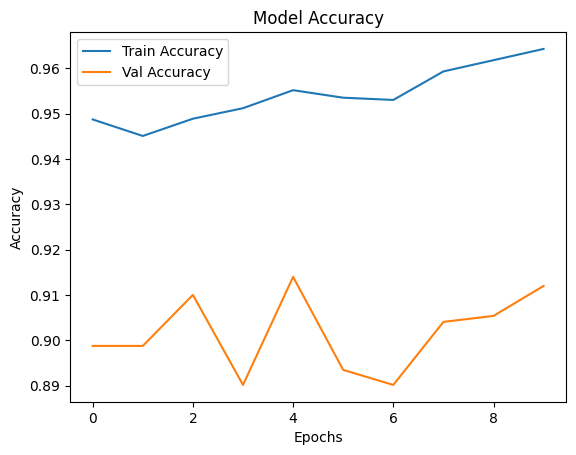

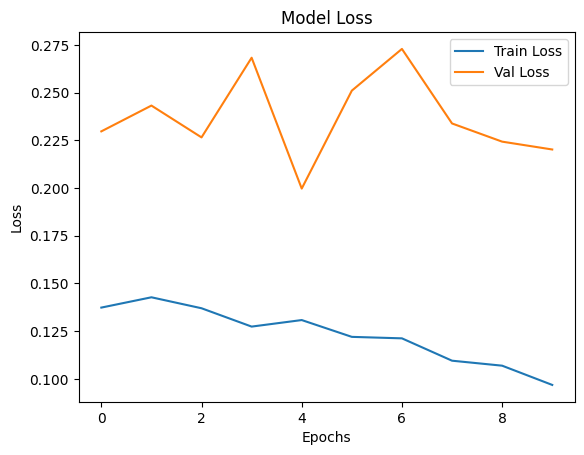

In [18]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Save the model

In [19]:
model.save("face_mask_detector.h5")
print("✅ Model saved as face_mask_detector.h5")


✅ Model saved as face_mask_detector.h5


In [20]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [21]:
model.save('/content/drive/MyDrive/FaceMaskModel/face_mask_detector.h5')